In [22]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file_path = 'Retail Sales Analysis.csv'

df = pd.read_csv(file_path)
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


# Clean data & Add month for trend analysis

In [24]:
df = df.dropna(subset=['category', 'total_sale', 'sale_date', 'customer_id']).copy()

df.loc[:, 'sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

df = df.dropna(subset=['sale_date']).copy()

df['Month'] = df['sale_date'].dt.to_period('M')

df['sale_date'] = df['sale_date'].astype(str)
df['Month'] = df['Month'].astype(str)

df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


# Save to SQLite & Check data

In [27]:
conn = sqlite3.connect('retail_sales.db')
df.to_sql('sales', conn, if_exists='replace', index=False)
print("Saved to SQLite!")

pd.read_sql_query("SELECT * FROM sales LIMIT 5", conn)

Saved to SQLite!


# Sales Trend Over Time

In [32]:
query = """
SELECT strftime('%Y-%m', sale_date) AS Month, SUM(total_sale) AS TotalSales
FROM sales
GROUP BY Month
ORDER BY Month
"""
sales_trend = pd.read_sql_query(query, conn)
sales_trend.head()

,Month,TotalSales
0,2022-01,22635.0
1,2022-02,16110.0
2,2022-03,24505.0
3,2022-04,28705.0
4,2022-05,24980.0


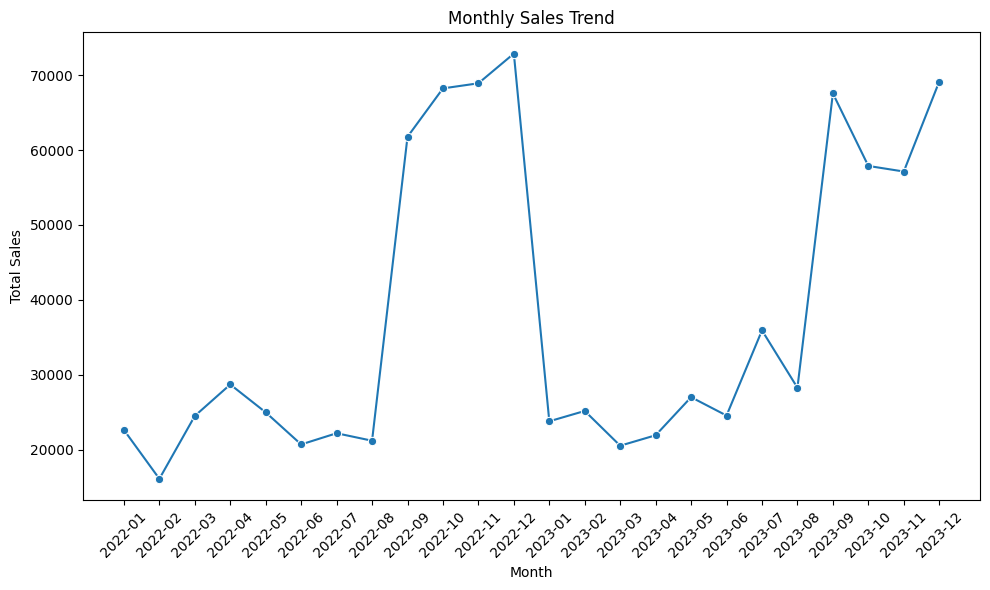

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_trend, x='Month', y='TotalSales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# Top-Performing Categories

In [30]:
query = """
SELECT category, SUM(total_sale) AS TotalSales
FROM sales
GROUP BY category
ORDER BY TotalSales DESC
LIMIT 10
"""
top_categories = pd.read_sql_query(query, conn)
top_categories

,category,TotalSales
0,Electronics,313810.0
1,Clothing,311070.0
2,Beauty,286840.0


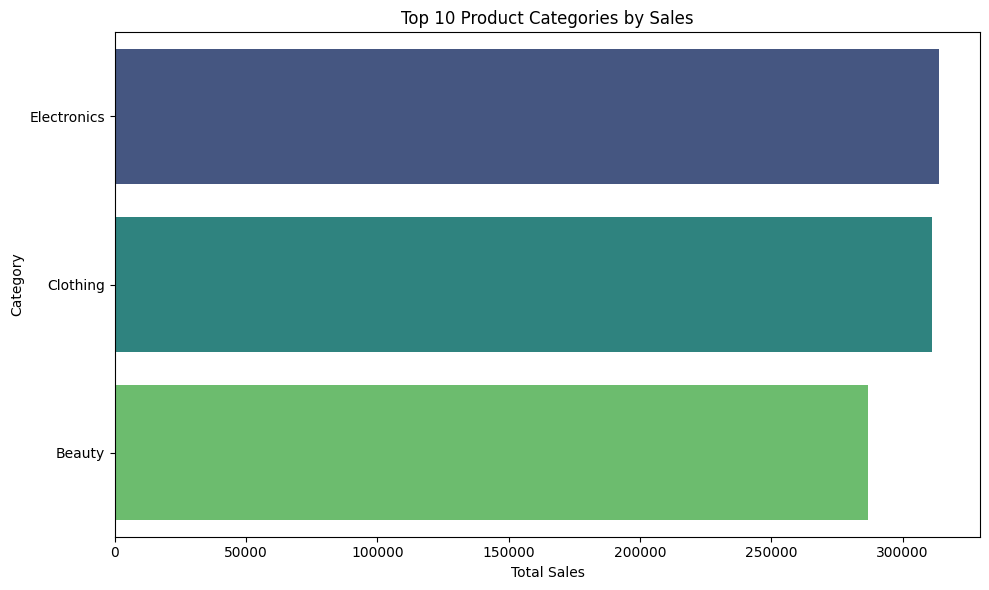

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_categories, x='TotalSales', y='category', palette='viridis')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Customer Analysis

In [19]:
query = """
SELECT customer_id, SUM(total_sale) AS TotalSales
FROM sales
GROUP BY customer_id
ORDER BY TotalSales DESC
LIMIT 10
"""
top_customers = pd.read_sql_query(query, conn)
top_customers

,customer_id,TotalSales
0,3,38440.0
1,1,30750.0
2,5,30405.0
3,2,25295.0
4,4,23580.0
5,87,15855.0
6,54,13475.0
7,71,12790.0
8,55,12080.0
9,84,11730.0


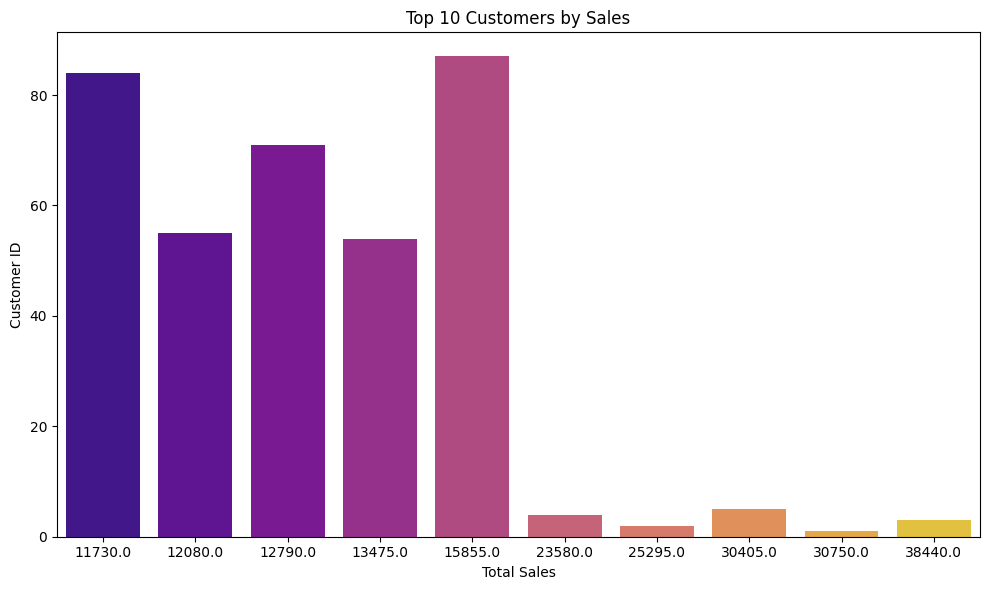

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x='TotalSales', y='customer_id', palette='plasma')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()